In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import dates
import math
from astropy.time import Time


from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.neural_network import MLPRegressor
from sklearn.cross_validation import train_test_split
from sklearn.learning_curve import validation_curve
from sklearn.metrics import accuracy_score
plt.style.use('seaborn-bright')

In [8]:
demon = pd.read_csv('Demon_Additional_Data.csv', low_memory=False)

In [9]:
off_val = demon.loc[:, 'Fractional size of off-limb dimming contribution'].values
on_val = demon.loc[:, 'Fraction of dimming on disk'].values

total_size = []
for i in range(len(off_val)):
    total_size.append(off_val[i] + on_val[i])
    
total_size = np.array(total_size)
    

In [10]:
demon.insert(16, 'Total Fraction of Dimming', total_size)

In [11]:
def norm(name):
    normed_data = (demon_sub[name] - np.min(demon_sub[name])) / (np.max(demon_sub[name]) - np.min(demon_sub[name]))
    return normed_data

In [12]:
def stand(name):
    stand_data = (demon_sub[name] - np.mean(demon_sub[name])) / (np.std(demon_sub[name]))
    return stand_data

In [13]:
demon_sub = demon[['Delta/Dimming Time', 'Flare Converted', 'Fraction of dimming on disk', 'Max Drop',
                   'Fractional size of off-limb dimming contribution', 'Off-Limb Percent', 'Total Fraction of Dimming']]



In [14]:
demon_sub_copy = demon_sub.copy()
no_flare = []
flare = []
flare_val = demon_sub_copy.loc[:, 'Flare Converted'].values
for i in range(len(demon_sub_copy)):
    if flare_val[i] == 1.0:
        no_flare.append(i)
    else:
        flare.append(i)

In [15]:
demon_sub_flare = demon_sub_copy.drop(no_flare)
demon_sub_noflare = demon_sub_copy.drop(flare)

In [16]:
demon_sub_noflare.drop('Flare Converted', axis=1, inplace=True)

In [17]:
demon_norm_flare = demon_sub_flare.copy()
demon_stand_flare = demon_sub_flare.copy()
demon_norm_noflare = demon_sub_noflare.copy()
demon_stand_noflare = demon_sub_noflare.copy()

In [18]:
sub_columns = demon_sub_flare.columns
for i in sub_columns:
    demon_norm_flare[i] = norm(i)
    demon_stand_flare[i] = stand(i)
    
sub_columns = demon_sub_noflare.columns
for i in sub_columns:
    demon_norm_noflare[i] = norm(i)
    demon_stand_noflare[i] = stand(i)

In [19]:
y_norm = pd.DataFrame((demon['Intensity'] - np.min(demon['Intensity'])) / (np.max(demon['Intensity']) - np.min(demon['Intensity'])))
y_stand = pd.DataFrame((demon['Intensity'] - np.mean(demon['Intensity'])) / (np.std(demon['Intensity'])))

In [20]:
y_norm_flare = y_norm.drop(no_flare)
y_norm_noflare = y_norm.drop(flare)
y_stand_flare = y_stand.drop(no_flare)
y_stand_noflare = y_stand.drop(flare)

## Neural net for normalized with flare

In [55]:
nn = MLPRegressor(hidden_layer_sizes=(4), max_iter=2000, solver='sgd', learning_rate_init=.15, tol=.000001, verbose=True)

In [56]:
X1, X2, y1, y2 = train_test_split(demon_norm_flare, y_norm_flare.values.ravel(), train_size=.80)

In [80]:
nn.fit(X1, y1)

Iteration 1, loss = 0.02356468
Iteration 2, loss = 0.00934459
Iteration 3, loss = 0.00876498
Iteration 4, loss = 0.00804795
Iteration 5, loss = 0.00749842
Iteration 6, loss = 0.00737596
Iteration 7, loss = 0.00706944
Iteration 8, loss = 0.00691412
Iteration 9, loss = 0.00668105
Iteration 10, loss = 0.00661892
Iteration 11, loss = 0.00652925
Iteration 12, loss = 0.00639690
Iteration 13, loss = 0.00624371
Iteration 14, loss = 0.00619241
Iteration 15, loss = 0.00630729
Iteration 16, loss = 0.00601454
Iteration 17, loss = 0.00614819
Iteration 18, loss = 0.00591516
Iteration 19, loss = 0.00585366
Iteration 20, loss = 0.00598246
Iteration 21, loss = 0.00576315
Iteration 22, loss = 0.00571319
Iteration 23, loss = 0.00568593
Iteration 24, loss = 0.00563465
Iteration 25, loss = 0.00562693
Iteration 26, loss = 0.00551951
Iteration 27, loss = 0.00547112
Iteration 28, loss = 0.00563764
Iteration 29, loss = 0.00542711
Iteration 30, loss = 0.00547040
Iteration 31, loss = 0.00541218
Iteration 32, los

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=4, learning_rate='constant',
       learning_rate_init=0.15, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=1e-06, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [81]:
y2_model = nn.predict(X2)

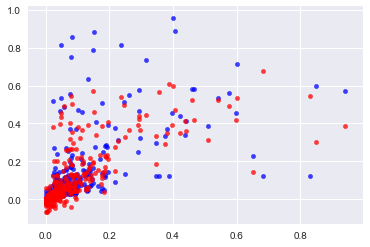

In [82]:
plt.scatter(X2.loc[:, 'Max Drop'], y2[:], alpha=.75, c='blue', s=20)
plt.scatter(X2.loc[:, 'Max Drop'], y2_model[:], alpha=.75, c='red', s=20)

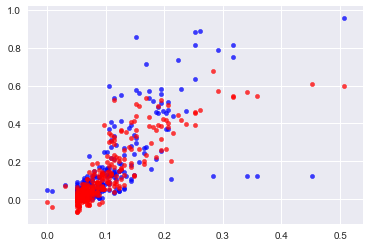

In [83]:
plt.scatter(X2.loc[:, 'Delta/Dimming Time'], y2[:], alpha=.75, c='blue', s=20)
plt.scatter(X2.loc[:, 'Delta/Dimming Time'], y2_model[:], alpha=.75, c='red', s=20)

In [84]:
nn.score(X2, y2)

0.73392419848203

## Neural net for normalized no flare

In [85]:
nn2 = MLPRegressor(hidden_layer_sizes=(6, 4), max_iter=500, solver='sgd', learning_rate_init=.05, tol=.000001, verbose=True)

In [86]:
sub_columns = demon_norm_noflare.columns
for i in sub_columns:
    demon_norm_noflare[i] = norm(i)
    demon_stand_noflare[i] = stand(i)

In [87]:
X1, X2, y1, y2 = train_test_split(demon_norm_noflare, y_norm_noflare.values.ravel(), train_size=.80)


In [89]:
nn2.fit(X1, y1)

Iteration 1, loss = 0.11550223
Iteration 2, loss = 0.02718058
Iteration 3, loss = 0.01458339
Iteration 4, loss = 0.01244123
Iteration 5, loss = 0.01168104
Iteration 6, loss = 0.01136176
Iteration 7, loss = 0.01116828
Iteration 8, loss = 0.01098465
Iteration 9, loss = 0.01084058
Iteration 10, loss = 0.01066386
Iteration 11, loss = 0.01055859
Iteration 12, loss = 0.01044059
Iteration 13, loss = 0.01029030
Iteration 14, loss = 0.01017421
Iteration 15, loss = 0.01004811
Iteration 16, loss = 0.00994491
Iteration 17, loss = 0.00985632
Iteration 18, loss = 0.00975303
Iteration 19, loss = 0.00961879
Iteration 20, loss = 0.00952328
Iteration 21, loss = 0.00940900
Iteration 22, loss = 0.00933289
Iteration 23, loss = 0.00922559
Iteration 24, loss = 0.00910628
Iteration 25, loss = 0.00903505
Iteration 26, loss = 0.00892683
Iteration 27, loss = 0.00883239
Iteration 28, loss = 0.00873862
Iteration 29, loss = 0.00858667
Iteration 30, loss = 0.00850978
Iteration 31, loss = 0.00838362
Iteration 32, los

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(6, 4), learning_rate='constant',
       learning_rate_init=0.05, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=1e-06, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [90]:
y2_model = nn2.predict(X2)

(0, 0.5)

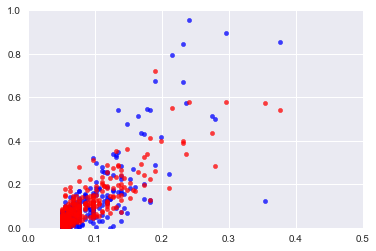

In [91]:
plt.scatter(X2.loc[:, 'Delta/Dimming Time'], y2[:], alpha=.75, c='blue', s=20)
plt.scatter(X2.loc[:, 'Delta/Dimming Time'], y2_model[:], alpha=.75, c='red', s=20)
plt.ylim(0, 1.00)
plt.xlim(0, .5)

(0, 1.0)

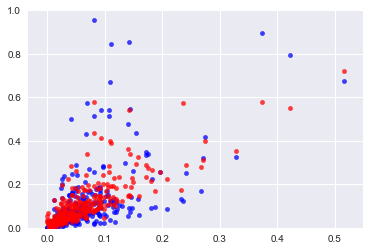

In [92]:
plt.scatter(X2.loc[:, 'Max Drop'], y2[:], alpha=.75, c='blue', s=20)
plt.scatter(X2.loc[:, 'Max Drop'], y2_model[:], alpha=.75, c='red', s=20)
plt.ylim(0, 1.00)

In [93]:
nn2.score(X2, y2)

0.7522497389970603

# NN with both flare and no flare

In [94]:
nn3 = MLPRegressor(hidden_layer_sizes=(6, 4), max_iter=500, solver='sgd', learning_rate_init=.05, tol=.000001, verbose=True)

In [95]:
demon_sub_norm = demon_sub.copy()
sub_columns = demon_sub.columns
for i in sub_columns:
    demon_sub_norm[i] = norm(i)


In [96]:
X1, X2, y1, y2 = train_test_split(demon_sub_norm, y_norm.values.ravel(), train_size=.70)

In [97]:
nn3.fit(X1, y1)

Iteration 1, loss = 0.04437154
Iteration 2, loss = 0.02226774
Iteration 3, loss = 0.01705664
Iteration 4, loss = 0.01551643
Iteration 5, loss = 0.01496130
Iteration 6, loss = 0.01446847
Iteration 7, loss = 0.01416667
Iteration 8, loss = 0.01392835
Iteration 9, loss = 0.01380104
Iteration 10, loss = 0.01362239
Iteration 11, loss = 0.01343897
Iteration 12, loss = 0.01332339
Iteration 13, loss = 0.01321883
Iteration 14, loss = 0.01315511
Iteration 15, loss = 0.01304446
Iteration 16, loss = 0.01296777
Iteration 17, loss = 0.01287726
Iteration 18, loss = 0.01287298
Iteration 19, loss = 0.01278944
Iteration 20, loss = 0.01272119
Iteration 21, loss = 0.01265678
Iteration 22, loss = 0.01268330
Iteration 23, loss = 0.01257730
Iteration 24, loss = 0.01255078
Iteration 25, loss = 0.01254062
Iteration 26, loss = 0.01245867
Iteration 27, loss = 0.01240510
Iteration 28, loss = 0.01236972
Iteration 29, loss = 0.01231750
Iteration 30, loss = 0.01228572
Iteration 31, loss = 0.01225370
Iteration 32, los

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(6, 4), learning_rate='constant',
       learning_rate_init=0.05, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=1e-06, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [98]:
y2_model = nn3.predict(X2)

(0, 0.5)

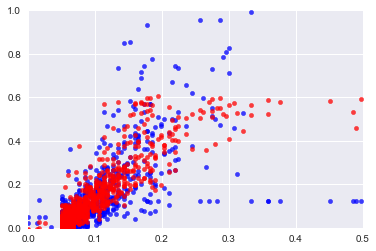

In [99]:
plt.scatter(X2.loc[:, 'Delta/Dimming Time'], y2[:], alpha=.75, c='blue', s=20)
plt.scatter(X2.loc[:, 'Delta/Dimming Time'], y2_model[:], alpha=.75, c='red', s=20)
plt.ylim(0, 1.00)
plt.xlim(0, .5)

C:\Users\kelly\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\kelly\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\kelly\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


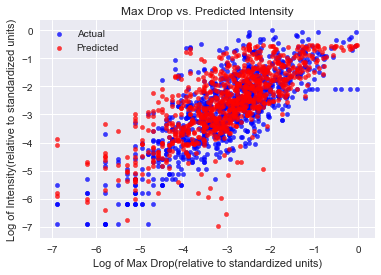

In [100]:
plt.scatter(np.log(X2.loc[:, 'Max Drop']), np.log(y2[:]), alpha=.75, c='blue', s=20, label='Actual')
plt.scatter(np.log(X2.loc[:, 'Max Drop']), np.log(y2_model[:]), alpha=.75, c='red', s=20, label='Predicted')
plt.xlabel('Log of Max Drop(relative to standardized units)');
plt.ylabel('Log of Intensity(relative to standardized units)');
plt.title('Max Drop vs. Predicted Intensity');
plt.legend();
plt.savefig('MaxVsIntensityPredicted.pdf', format='pdf', dpi=1200)

In [101]:
nn3.score(X2, y2)

0.6931922528857185

# Looking back at demon data

(0, 15000)

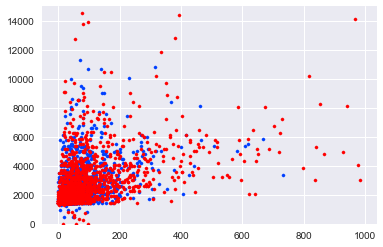

In [46]:
plt.scatter(demon_sub_noflare.loc[:, 'Max Drop'], demon_sub_noflare.loc[:, 'Delta/Dimming Time'], s=10, )
plt.scatter(demon_sub_flare.loc[:, 'Max Drop'], demon_sub_flare.loc[:, 'Delta/Dimming Time'], s=10, c='red')
plt.ylim(0, 15000)

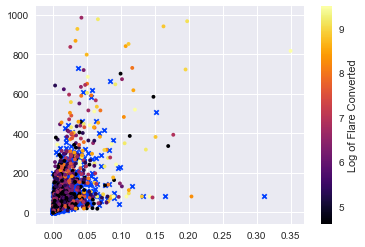

In [47]:
    plt.scatter(demon_sub_noflare.loc[:, 'Total Fraction of Dimming'], demon_sub_noflare.loc[:, 'Max Drop'], s=20, marker='x')
#plt.scatter(demon_sub_flare.loc[:, 'Total Fraction of Dimming'], demon_sub_flare.loc[:, 'Max Drop'], s=15, c='red' )
plt.scatter(demon_sub_flare.loc[:, 'Total Fraction of Dimming'], demon_sub_flare.loc[:, 'Max Drop'], s=15,
            c=np.log(demon_sub_flare.loc[:, 'Flare Converted'].values),  edgecolor='none',
            cmap=plt.cm.get_cmap('inferno', ))
plt.colorbar(label='Log of Flare Converted', ticks=range(12))
plt.clim(4.61, 9.5)
#plt.ylim(0, 15000)

In [48]:
inten_val = demon.loc[:, 'Intensity'].values
small_events_ind = []
for i in range(len(demon)):
    if inten_val[i] < 10:
        small_events_ind.append(i)
        
demon_nosmall_events = demon.drop(small_events_ind)

In [49]:
normed_int = (demon_nosmall_events['Intensity'] - np.min(demon_nosmall_events['Intensity'])) / (np.max(demon_nosmall_events['Intensity']) - np.min(demon_nosmall_events['Intensity']))
normed_max = (demon_nosmall_events['Max Drop'] - np.min(demon_nosmall_events['Max Drop'])) / (np.max(demon_nosmall_events['Max Drop']) - np.min(demon_nosmall_events['Max Drop']))
normed_df = pd.DataFrame(normed_int)
normed_df.insert(1, 'Max Drop', normed_max)

C:\Users\kelly\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


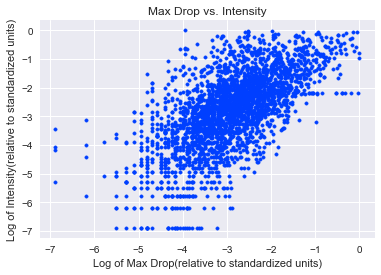

In [50]:
plt.scatter(np.log(normed_df.loc[:, 'Max Drop']),np.log(normed_df.loc[:, 'Intensity']),s=12)
#             c=np.log(demon_nosmall_events.loc[:, 'Flare Converted'].values),  edgecolor='none',
#             cmap=plt.cm.get_cmap('inferno', ), )
# plt.colorbar(label='Log of Flare Converted', ticks=range(12))
# plt.clim(4.61, 9.5)
plt.xlabel('Log of Max Drop(relative to standardized units)');
plt.ylabel('Log of Intensity(relative to standardized units)');
plt.title('Max Drop vs. Intensity');
plt.savefig('MaxVsIntensity.pdf', format='pdf', dpi=1200)

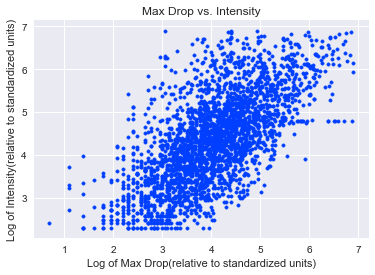

In [51]:
plt.scatter(np.log(demon_nosmall_events.loc[:, 'Max Drop']), np.log(demon_nosmall_events.loc[:, 'Intensity']),s=12)
#             c=np.log(demon_nosmall_events.loc[:, 'Flare Converted'].values),  edgecolor='none',
#             cmap=plt.cm.get_cmap('inferno', ), )
# plt.colorbar(label='Log of Flare Converted', ticks=range(12))
# plt.clim(4.61, 9.5)
plt.xlabel('Log of Max Drop(relative to standardized units)');
plt.ylabel('Log of Intensity(relative to standardized units)');
plt.title('Max Drop vs. Intensity');
plt.savefig('MaxVsIntensity.pdf', format='pdf', dpi=1200)

In [52]:
flare = demon.loc[:, 'Flare Converted'].values
count = 0
for i in range(len(demon)):
    if flare[i] == 1.0:
        count += 1
        

In [53]:
count / 3089

0.511492392359987

In [54]:
demon

,Peak Datetime,Intensity,Start,End,Delta/Dimming Time,Event #,Max Drop,Lat,Lon,dist.R,AR#,Count,Flare,Flare Converted,Fraction of dimming on disk,Fractional size of off-limb dimming contribution,Total Fraction of Dimming,Is Off-Limb,Off-Limb Percent
0,2010-05-23 16:46:00,252.000000,16:46,17:48,3720.0,4321,44.0,28.0,-3.0,0.50,NaN,40,NaN,1.0,0.030997,0.000008,0.031005,False,0.026350
1,2010-05-24 13:24:00,94.000000,13:22,13:52,1800.0,4322,62.0,17.0,33.0,0.61,NaN,24,NaN,1.0,0.008529,0.000008,0.008538,False,0.095694
2,2010-05-31 19:54:00,281.000000,19:38,20:34,3360.0,4323,41.0,24.0,29.0,0.62,NaN,37,NaN,1.0,0.023061,0.000008,0.023070,False,0.035501
3,2010-06-12 01:08:00,98.000000,1:04,1:50,2760.0,4324,84.0,29.0,52.0,0.85,AR 1081,32,M4,4000.0,0.010658,0.000173,0.010831,False,1.593318
4,2010-06-12 09:28:00,61.000000,9:28,9:52,1440.0,4325,104.0,25.0,58.0,0.88,AR 1081,21,M2,2000.0,0.004628,0.000008,0.004636,False,0.177313
5,2010-06-13 05:46:00,370.000000,5:42,6:32,3000.0,4326,376.0,NaN,NaN,1.08,NaN,34,M2,2000.0,0.000288,0.027543,0.027831,True,98.966030
6,2010-06-14 00:58:00,86.000000,0:58,1:28,1800.0,4327,215.0,NaN,NaN,1.01,NaN,24,C2,200.0,0.000501,0.006511,0.007012,True,92.848768
7,2010-06-16 03:24:00,139.000000,3:16,4:04,2880.0,4328,69.0,NaN,NaN,1.05,NaN,33,NaN,1.0,0.000049,0.011400,0.011450,True,99.568555
8,2010-06-20 01:26:00,42.000000,1:24,1:50,1560.0,4329,11.0,NaN,NaN,1.08,NaN,22,NaN,1.0,0.000008,0.006740,0.006748,True,99.878038
9,2010-06-21 19:16:00,125.000000,18:56,19:24,1680.0,4330,76.0,21.0,51.0,0.81,NaN,23,NaN,1.0,0.007989,0.000008,0.007997,False,0.102916
